#### 0.0: Library setup

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/jgoodz8/3251_Project_Group2/master/AutoInsurance.csv')
df['Binary Response']= np.where(df['Response']=="Yes",1,0)

In [3]:
df.transpose().iloc[:,0:5]

,0,1,2,3,4
Customer,BU79786,QZ44356,AI49188,WW63253,HB64268
State,Washington,Arizona,Nevada,California,Washington
Customer Lifetime Value,2763.52,6979.54,12887.4,7645.86,2813.69
Response,No,No,No,No,No
Coverage,Basic,Extended,Premium,Basic,Basic
Education,Bachelor,Bachelor,Bachelor,Bachelor,Bachelor
Effective To Date,2/24/11,1/31/11,2/19/11,1/20/11,3/2/2011
EmploymentStatus,Employed,Unemployed,Employed,Unemployed,Employed
Gender,F,F,F,M,M
Income,56274,0,48767,0,43836


## **Goal**:   
Using Logistic regression, Predict the response received through the marketing campaign.  
- ['Response'] = Yes/No

Using the following variables
1. ['Renew Offer Type']
2. ['Sales Channel']
3. ['Gender']
4. ['State']
5. ['Income']
6. ['Monthly Premium Auto']

#### Assumptions:
- Variables were picked based on intuition (i.e assuming that Monthly Premiums are more likely to influence renewal as opposed to the gender variable.

# 1. Preprocessing for Logistic regression

In [4]:
regressors= ['Renew Offer Type','Sales Channel','Gender','State','Income','Monthly Premium Auto']
df_log= df[regressors]
df_log.transpose().iloc[:,0:5]

,0,1,2,3,4
Renew Offer Type,Offer1,Offer3,Offer1,Offer1,Offer1
Sales Channel,Agent,Agent,Agent,Call Center,Agent
Gender,F,F,F,M,M
State,Washington,Arizona,Nevada,California,Washington
Income,56274,0,48767,0,43836
Monthly Premium Auto,69,94,108,106,73


### 1.1 Numeric Variables

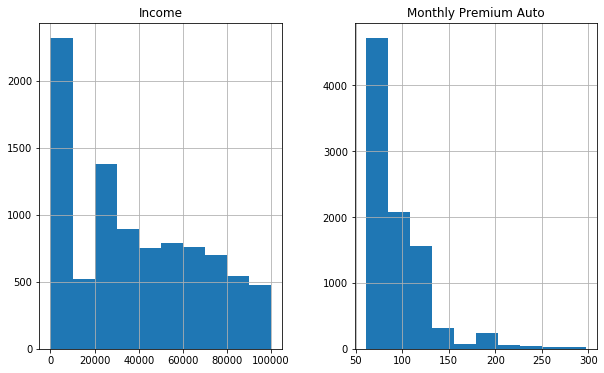

In [5]:
# Plot the histograms of the individual columns
numeric= ['Income','Monthly Premium Auto']
df_log[numeric].hist(figsize=(10,6))
plt.show()

### 1.2 Categorical Variables

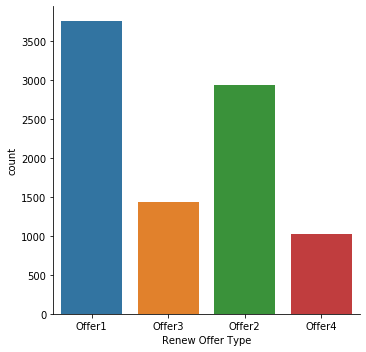

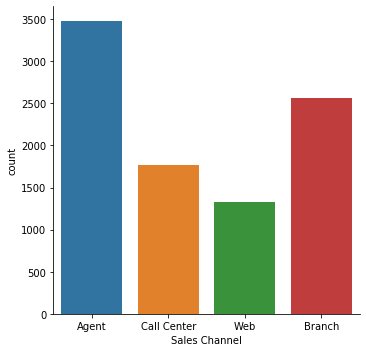

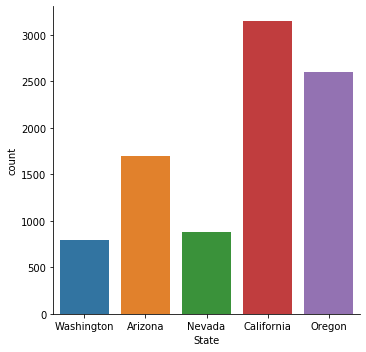

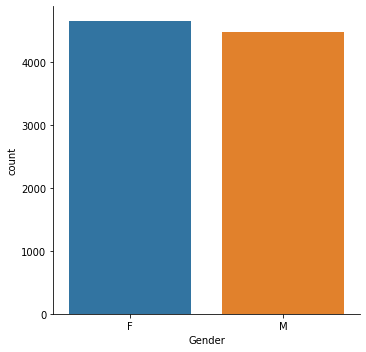

In [6]:
categoric= ['Renew Offer Type','Sales Channel','Gender','State']
sns.catplot('Renew Offer Type',kind="count",data=df_log)
sns.catplot('Sales Channel',kind="count",data=df_log)
sns.catplot('State',kind="count",data=df_log)
sns.catplot('Gender',kind="count",data=df_log)
plt.show()

In [7]:
## Convert Categorical variables into binary variables in order for the logistic model to utilize them
df_categoric= pd.get_dummies(df_log[categoric])
df_numeric= df_log[numeric]

df_processed= df_numeric.join(df_categoric)
df_processed.transpose().iloc[:,0:5]

,0,1,2,3,4
Income,56274,0,48767,0,43836
Monthly Premium Auto,69,94,108,106,73
Renew Offer Type_Offer1,1,0,1,1,1
Renew Offer Type_Offer2,0,0,0,0,0
Renew Offer Type_Offer3,0,1,0,0,0
Renew Offer Type_Offer4,0,0,0,0,0
Sales Channel_Agent,1,1,1,0,1
Sales Channel_Branch,0,0,0,0,0
Sales Channel_Call Center,0,0,0,1,0
Sales Channel_Web,0,0,0,0,0


# 2. Logistic Prediction Model

In [8]:
from statsmodels.discrete.discrete_model import Logit
from scipy.special import logit

In [13]:
X= list(df_processed)
Y= 'Binary Response'
m= Logit(df[Y],df_processed[X])
model= m.fit(maxiter=100)




         Current function value: 0.363843
         Iterations: 100


C:\Users\zain.syed\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [16]:
print(model.summary2())

                                      Results: Logit
Model:                       Logit                    Pseudo R-squared:         0.114      
Dependent Variable:          Binary Response          AIC:                      6674.6907  
Date:                        2020-03-28 19:17         BIC:                      6774.3673  
No. Observations:            9134                     Log-Likelihood:           -3323.3    
Df Model:                    13                       LL-Null:                  -3751.6    
Df Residuals:                9120                     LLR p-value:              1.0460e-174
Converged:                   0.0000                   Scale:                    1.0000     
No. Iterations:              100.0000                                                      
-------------------------------------------------------------------------------------------
                           Coef.     Std.Err.      z    P>|z|      [0.025         0.975]   
---------------------------

**Conclusion:**  
Based on the model summary,
The following can be concluded:  
1. The variables ['Income'] and ['Monthly Premium Auto'] have absolutely no effect on the probability of a response from a marketing campaign.  


2. ['Renew Offer Type_Offer2'] has the strongest positive correlation with a response and 
   ['Renew Offer Type_Offer4'] has the strongest negative correlation with a response.


3. ['Renew Offer Type'] in general has the strongest correlation with a response.

Derive the binary estimates $\hat{y}$ of the response $y$.  
  A decision boundary of **0.2** has been used, i.e A threshold value above which the value is classified as 1 and below it it classified as 0.   

**To summarize**:  
p >= 0.2, $\hat{y}$ = 1  
p <  0.2,   $\hat{y}$ = 0

In [174]:
y_hat_prob= model.predict(df_processed[X])
y_hat=(y_hat_prob >= 0.2) * 1

Y= 'Binary Response'
y= df[Y]

Using a **Confusion Matrix**, we Compare and contrast our estimates $\hat{y}$ with the actual response $y$

In [175]:
confusion=pd.crosstab(y_hat,y)
confusion

Binary Response,0,1
row_0,,
0,5733,636
1,2093,672


**Conclusion:**  
From this we can see **5733** marketing responses that were correctly classified as no response.  
**672** cases that were correctly classified as having a response.

The remaining **636 + 2093** estimates were incorrect.

In [146]:
def accuracy(predicted,actual):
    
    diff= predicted - actual
    total = len(diff)
    incorrect= np.count_nonzero(diff)
    
    result= (total - incorrect) / total
    
    return result


accuracy(y,y_hat)

0.7012261878694985

Currently, we have an accuracy of 70% with a decision boundary of 0.2.  
Let's assume we want to optimize our prediction of Positive response, i.e maximize **true positives**.


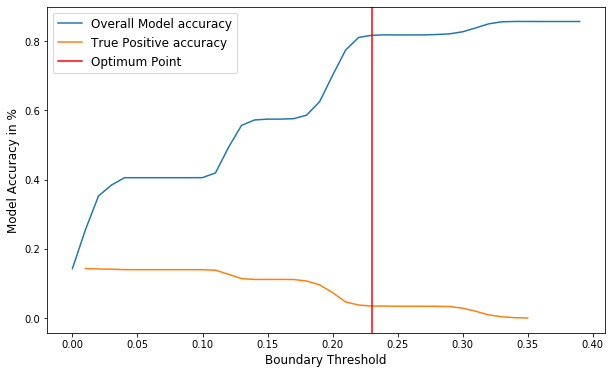

In [184]:
def true_pos(cm):
    num= cm.iloc[1,1]
    denom = np.sum(np.sum(cm))
    out= num/denom
    
    return out

decision_boundaries= np.arange(0,0.4,0.01)
accuracies=[]
db=[]
for i in range(len(decision_boundaries)):
    try:
        p= decision_boundaries[i]
        y_hat=(y_hat_prob >= p) * 1
        cm= pd.crosstab(y_hat,y)
        
        accuracies.append(true_pos(cm))
        db.append(p)
        
    
    except:
        pass

accuracies_2=[]
for i in range(len(decision_boundaries)):
    p = decision_boundaries[i]
    y_hat= (y_hat_prob >= p) *1
    accuracies_2.append(accuracy(y_hat,y))
    
plt.figure(figsize=(10,6))

plt.plot(decision_boundaries,accuracies_2)
plt.plot(db,accuracies)
plt.xlabel('Boundary Threshold',fontsize=12)
plt.ylabel('Model Accuracy in %',fontsize=12)
plt.axvline(0.23, color='red')
plt.legend(('Overall Model accuracy','True Positive accuracy','Optimum Point'),fontsize=12)
plt.show()
    

**Conclusion:**  
This graph visualizes an interesting tradeoff.   
As we increase the boundary threshold, we increase the overall model accuracy at the expense of True positive accuracy. 
  
A boundary threshold of 0.23 maximises overall model accuracy while keeping a reasonable true positive accuracy.  

Although no ideal optimum points exist, we can use this as a guideline to fine tune our desired outcome.

# 3. Model Improvement

Based on the model summary, we previously saw that **['Renew Offer Type']** had the biggest variable coefficients.
Let's try to predict **['Response']** using only **['Renew Offer Type']**.

In [226]:
Y= 'Binary Response'
X= 'Renew Offer Type'
y= df[Y]
x= pd.get_dummies(df[X])

m= Logit(y,x)
model= m.fit(maxiter=100)


         Current function value: 0.369597
         Iterations: 100


C:\Users\zain.syed\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [227]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.100      
Dependent Variable: Binary Response  AIC:              6759.7911  
Date:               2020-03-29 18:46 BIC:              6788.2701  
No. Observations:   9134             Log-Likelihood:   -3375.9    
Df Model:           3                LL-Null:          -3751.6    
Df Residuals:       9130             LLR p-value:      1.4500e-162
Converged:          0.0000           Scale:            1.0000     
No. Iterations:     100.0000                                      
------------------------------------------------------------------
          Coef.    Std.Err.    z     P>|z|     [0.025     0.975]  
------------------------------------------------------------------
Offer1    -1.6708    0.0447 -37.3591 0.0000     -1.7585    -1.5832
Offer2    -1.1872    0.0437 -27.1782 0.0000     -1.2728    -1.1016
Offer3    -3.8445    0.1845 -20.8352 0.0000     -4.2061    -3.4828
Offer4   -24.1804 5566.3110  -0.0043 0.9965 -10933.9496 10885.5887
==================================================================

"""

In [228]:
out=list(x)
y_hat_prob= model.predict(x[out])
y_hat=(y_hat_prob >= 0.2) * 1

confusion=pd.crosstab(y_hat,y)
confusion

Binary Response,0,1
row_0,,
0,5584,624
1,2242,684


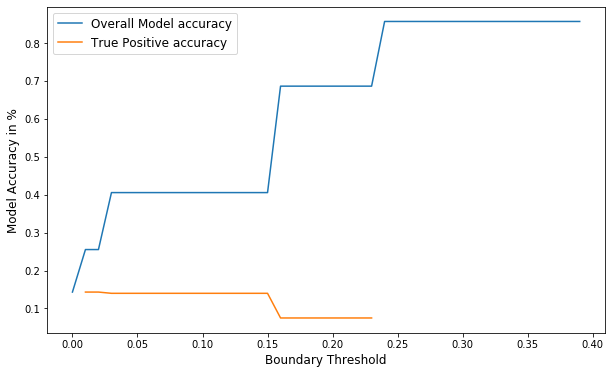

In [229]:
decision_boundaries= np.arange(0,0.4,0.01)
accuracies=[]
db=[]
for i in range(len(decision_boundaries)):
    try:
        p= decision_boundaries[i]
        y_hat=(y_hat_prob >= p) * 1
        cm= pd.crosstab(y_hat,y)
        
        accuracies.append(true_pos(cm))
        db.append(p)
        
    
    except:
        pass

accuracies_2=[]
for i in range(len(decision_boundaries)):
    p = decision_boundaries[i]
    y_hat= (y_hat_prob >= p) *1
    accuracies_2.append(accuracy(y_hat,y))
    
plt.figure(figsize=(10,6))

plt.plot(decision_boundaries,accuracies_2)
plt.plot(db,accuracies)
plt.xlabel('Boundary Threshold',fontsize=12)
plt.ylabel('Model Accuracy in %',fontsize=12)
#plt.axvline(0.23, color='red')
plt.legend(('Overall Model accuracy','True Positive accuracy','Optimum Point'),fontsize=12)
plt.show()
    